In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='Malgun Gothic')

## 1. 생존자 중 몇 명인지 계산하세요

In [2]:
titanic_df = pd.read_csv('./titanic.csv')
survived_count = titanic_df['Survived'].sum()

print("생존자 수:", survived_count)

생존자 수: 342


## 2. 항구 "S" 에서 탑승한 승객 수를 계산하세요

In [3]:
passengers_s = (titanic_df['Embarked'] == 'S').sum()

print("항구 S에서 탑승한 승객 수:", passengers_s)

항구 S에서 탑승한 승객 수: 644


## 3. 남성 승객 수를 계산하세요

In [4]:
m_passenger_count = (titanic_df['Sex'] == 'male').sum()

print("남성 승객 수:", m_passenger_count)

남성 승객 수: 577


## 4. 3등실에 탑승하고 지불한 요금이 40,000 미만인 승객 수를 계산하세요

In [5]:
third_class_passengers = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] < 40000)]

print("3등실에 탑승하고 요금이 40,000 미만인 승객 수:", len(third_class_passengers))

3등실에 탑승하고 요금이 40,000 미만인 승객 수: 491


## 5. 승객 ID가 674인 승객의 이름을 찾아보세요

In [6]:
passenger_674 = titanic_df.loc[titanic_df['PassengerId'] == 674]
passenger_674_name = passenger_674['Name'].values[0]

print("승객 ID 674의 이름:", passenger_674_name)

승객 ID 674의 이름: Wilhelms, Mr. Charles


## 6.  승객들의 평균 나이를 계산하세요

In [7]:
print("승객들의 평균 나이:", titanic_df['Age'].mean())

승객들의 평균 나이: 29.69911764705882


## 7. 생존자와 사망자의 수를 각각 계산하세요

In [8]:
survived_count = (titanic_df['Survived'] == 1).sum()
dead_count = (titanic_df['Survived'] == 0).sum()

print("생존자 수:", survived_count)
print("사망자 수:", dead_count)

생존자 수: 342
사망자 수: 549


## 8. 남성과 여성 승객 수를 계산하세요

In [9]:
male_count = (titanic_df['Sex'] == 'male').sum()
female_count = (titanic_df['Sex'] == 'female').sum()

print("남성 승객 수:", male_count)
print("여성 승객 수:", female_count)

남성 승객 수: 577
여성 승객 수: 314


## 9. 각 성별에 따른 생존자와 사망자의 수를 계산하세요

In [10]:
gender_survival_counts = titanic_df.groupby('Sex')['Survived'].value_counts().unstack()

print(gender_survival_counts)

Survived    0    1
Sex               
female     81  233
male      468  109


## 10. 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요

In [11]:
class_per_bill_pivot_table = titanic_df.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc='mean')

print(class_per_bill_pivot_table)

Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


## 11. 탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화

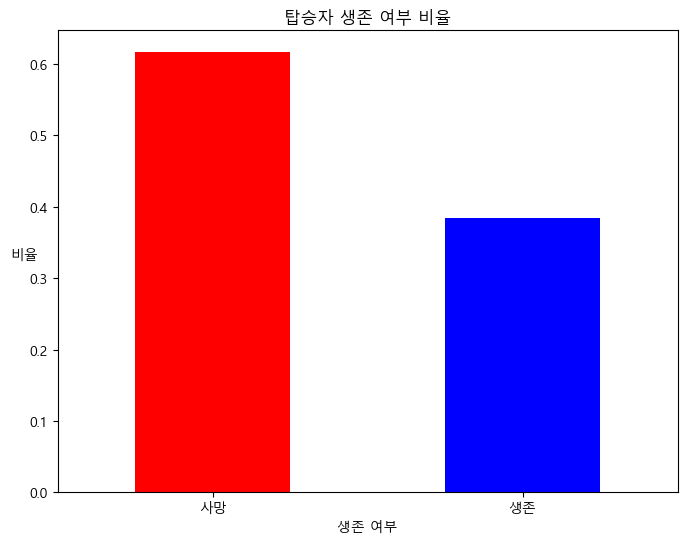

In [12]:
survival_counts = titanic_df['Survived'].value_counts()
survival_ratio = survival_counts / len(titanic_df)

plt.figure(figsize=(8, 6))
survival_ratio.plot(kind='bar', color=['red', 'blue'])
plt.title("탑승자 생존 여부 비율")
plt.xticks([0, 1], ['사망', '생존'], rotation=0)
plt.xlabel("생존 여부")
plt.ylabel("비율", rotation=0)
plt.show()

## 12.	나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화

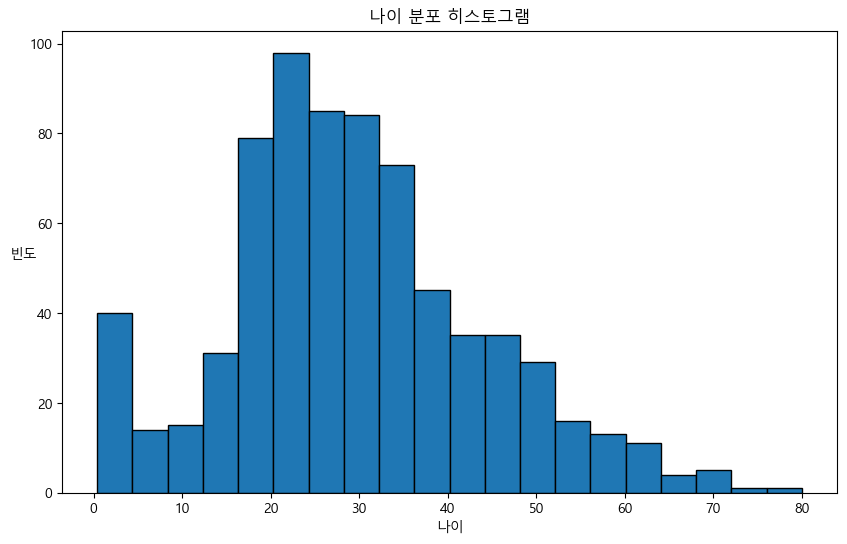

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'], bins=20, edgecolor='black')
plt.title("나이 분포 히스토그램")
plt.xlabel("나이")
plt.ylabel("빈도", rotation=0)
plt.show()

## 13.	나이와 요금 간의 산점도 시각화

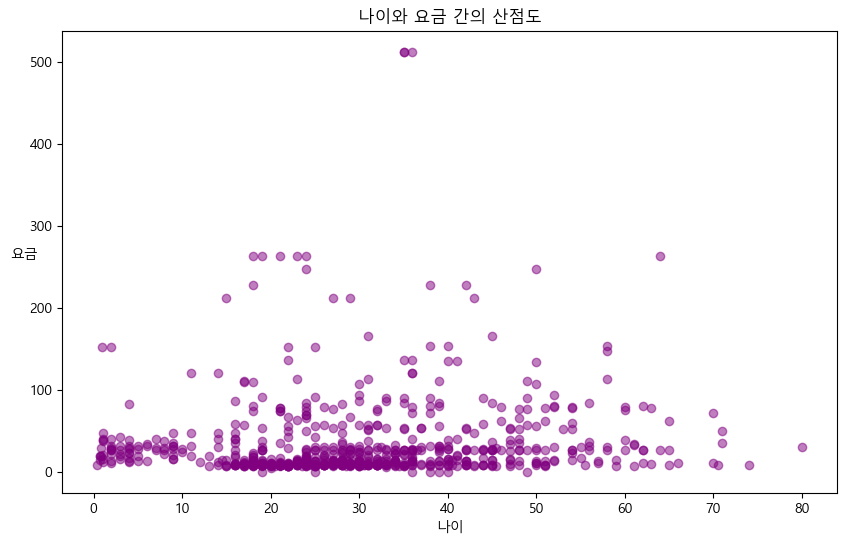

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], color='purple', alpha=0.5)
plt.title("나이와 요금 간의 산점도")
plt.xlabel("나이")
plt.ylabel("요금", rotation=0)
plt.show()

## 14. 객실 등급(Pclass)별로 생존자와 사망자 수를 막대그래프로 시각화.

<Figure size 800x600 with 0 Axes>

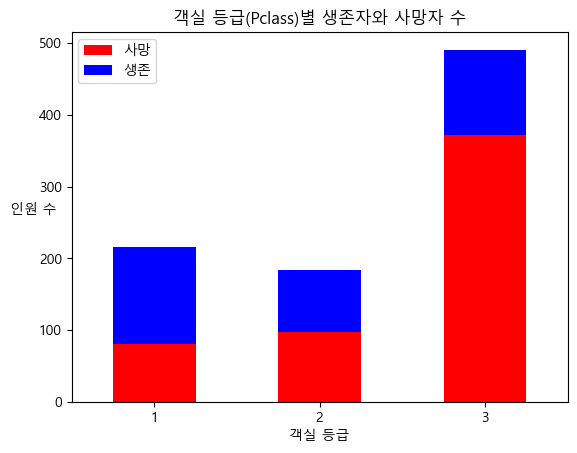

In [15]:
survival_by_pclass = titanic_df.groupby('Pclass')['Survived'].value_counts().unstack()

plt.figure(figsize=(8, 6))
survival_by_pclass.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("객실 등급(Pclass)별 생존자와 사망자 수")
plt.xlabel("객실 등급")
plt.ylabel("인원 수", rotation=0)
plt.xticks(rotation=0)
plt.legend(['사망', '생존'])
plt.show()